In [1]:
from fluorCalc import *

In [2]:
from darkplot import *

# Perform Calculations

In [3]:
default_experiment = experiment(nmc = 5000)

expected count rate: 1.545e+05 photons per second
Using n =  5000
estimated error = 4.55e+03 = 2.94%
solid angle fraction: 0.4918
crude count rate: 2.602e+05 photons per second, difference of 68.45%


In [4]:
sweep = angle_sweep(30, 60, 5, default_experiment)

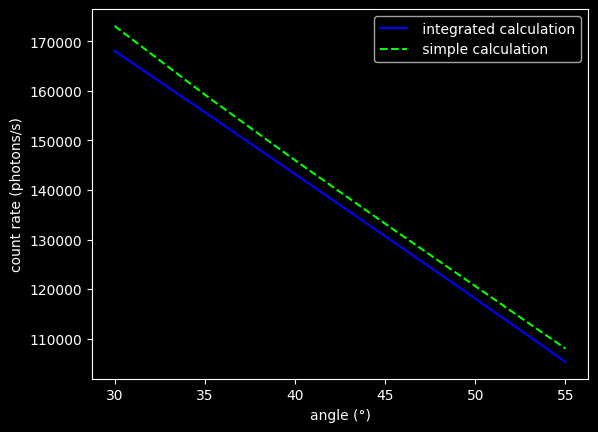

In [5]:
sweep.plot_result()